# 1. Exploratory Data Analysis (EDA)

This is an attempt to analyse a dataset available here - https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset



## Data Loading

Let us load the csv file...

In [ ]:
# Connect with Google Drive, locate the uploaded dataset and read the csv file into a dataframe using pandas library.
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
%cd /content/drive/MyDrive/DataForColab

df = pd.read_csv('insurance.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DataForColab


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Let us take a look at how the data looks like - in summary.

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Preprocessing

Now let us do a little bit of cleaning of data. We will first remove duplicates and then treat rows with Null values.

In [ ]:
duplicate_rows_df = df[df.duplicated()]
#The df.duplicated() method in pandas is used to identify duplicate rows within a DataFrame.
#It returns a boolean Series where True indicates a duplicate row and False indicates a unique row.

print("Number of Total rows", df.shape)
print("Number of Duplicate rows: ", duplicate_rows_df.shape)

Number of Total rows (1338, 7)
Number of Duplicate rows:  (1, 7)


Now the null values...

In [ ]:
df.isnull().sum() #Checking which parameter has how many null values. Here we see that none of the rows has null value, so we are good.

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## Data Visualization

Now let us start plotting these to better make sense of the data...

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

*Key Differences Between Matplotlib and Seaborn:*

*Matplotlib: Low-level (more control) | Seaborn: High-level (easier, built on Matplotlib)*


*Matplotlib: Verbose, more code | Seaborn: Concise, defaults to good-looking visuals*


*Matplotlib: Full Control | Seaborn: Abstracted, works well with pandas dataframes*

Let us create a few plots between Age & Charges; BMI & Charges; Children & Charges.

Also, let us separate the male and female charts for better understanding.

As these are similar charts let us write a function that can be called with different features as arguments.

In [ ]:
# Define the plotting function
def plot_feature_vs_charges(male_data, female_data, feature_name, axes, x_min, x_max, x_interval, sex_color):
    """
    Generates scatter plots of a numerical feature against charges, separated by sex.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data - male and female
        feature_name (str): The name of the numerical feature to plot.
        axes (matplotlib.axes.Axes or array of Axes): The axes objects to plot on.
        x_min, x_max, x_interval (int): Parameters for the x-axis.
        sex_color (dict): A dictionary mapping sex values to colors.
    """

    x_ticks = range(x_min, x_max + x_interval, x_interval)

    # Axes is a 2-element array for male (axes[0]) and female (axes[1]) plots
    axes[0].scatter(male_data[feature_name], male_data['charges'], color=sex_color['male'], label='Male', alpha=0.5)
    axes[0].set_xlabel(feature_name.capitalize())
    axes[0].set_ylabel('Charges')
    axes[0].set_title(f'{feature_name.capitalize()} vs Charges (Male)')
    axes[0].legend()
    axes[0].set_xlim(x_min, x_max)
    axes[0].set_xticks(x_ticks)

    axes[1].scatter(female_data[feature_name], female_data['charges'], color=sex_color['female'], label='Female', alpha=0.5)
    axes[1].set_xlabel(feature_name.capitalize())
    axes[1].set_ylabel('Charges')
    axes[1].set_title(f'{feature_name.capitalize()} vs Charges (Female)')
    axes[1].set_xlim(x_min, x_max)
    axes[1].set_xticks(x_ticks)
    axes[1].legend()

    axes[0].tick_params(axis='x', labelsize=10)
    axes[1].tick_params(axis='x', labelsize=10)

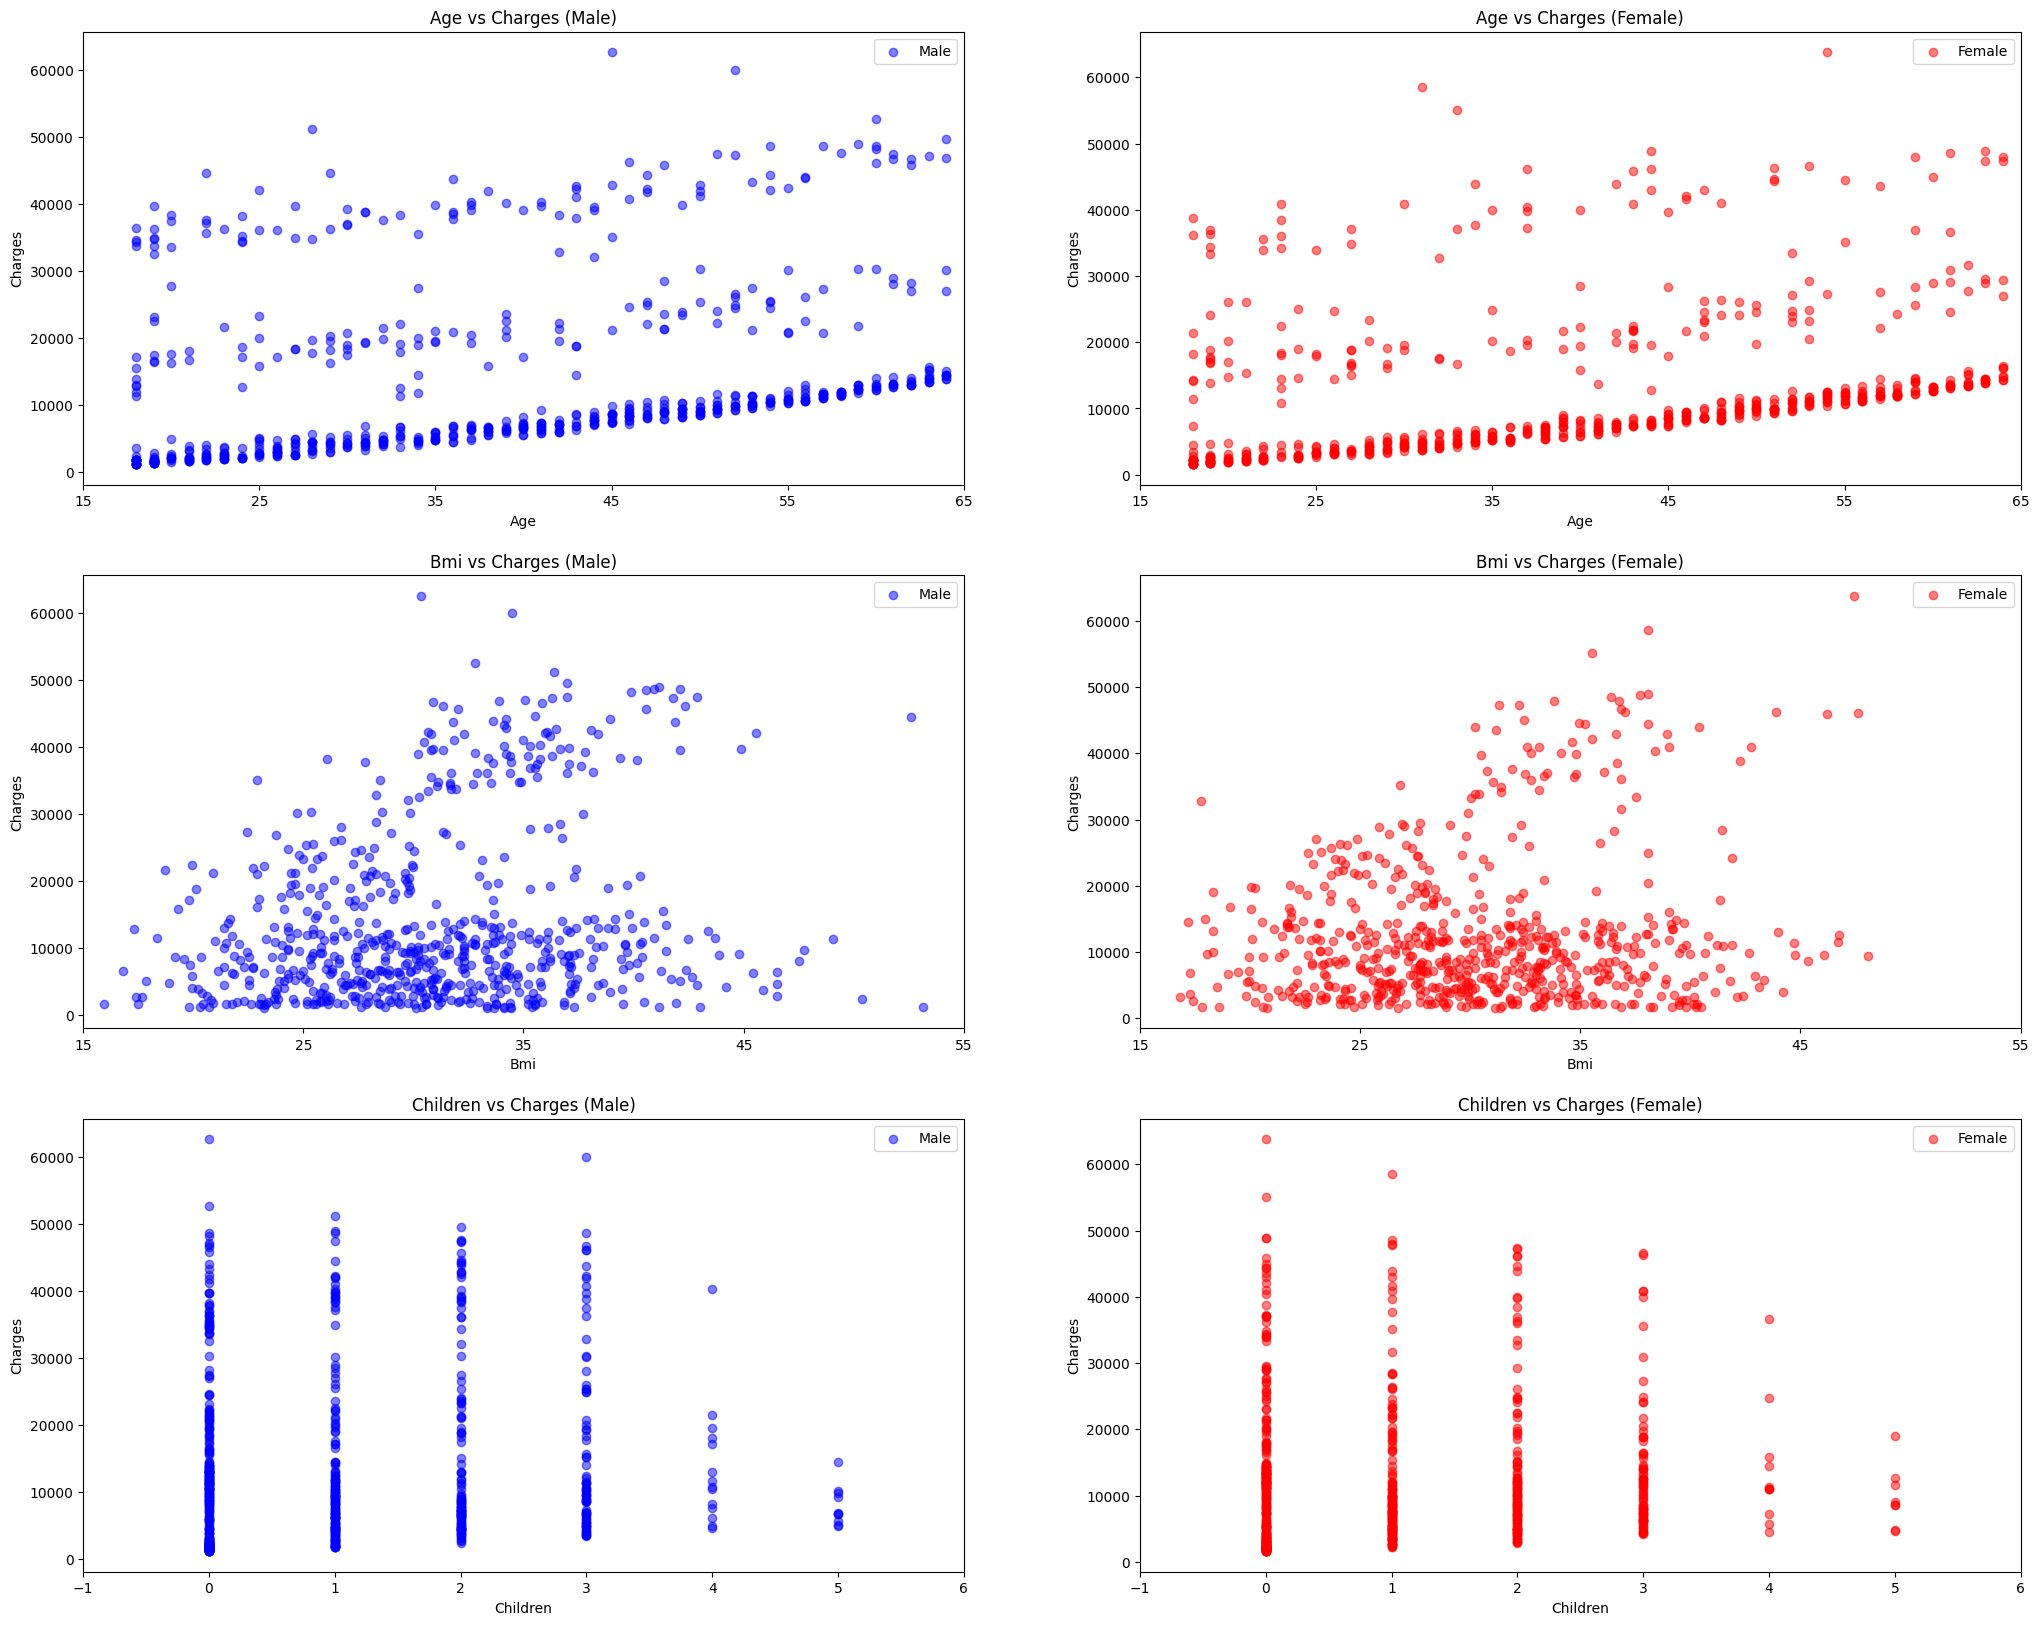

In [ ]:
sex_color = {'male': 'blue',
             'female': 'red'}

fig, axes = plt.subplots(3, 2, figsize=(25, 20)) # 3 rows, 2 columns of subplots

male_data = df[df['sex'] == 'male']
female_data = df[df['sex'] == 'female']

plot_feature_vs_charges(male_data, female_data, 'age', axes[0], 15, 65, 10, sex_color)
plot_feature_vs_charges(male_data, female_data, 'bmi', axes[1], 15, 55, 10, sex_color)
plot_feature_vs_charges(male_data, female_data, 'children', axes[2], -1, 6, 1, sex_color)

We have seen how the charges behave as compared to numerical features. Let us now explore the categorical features - region and smoker status.

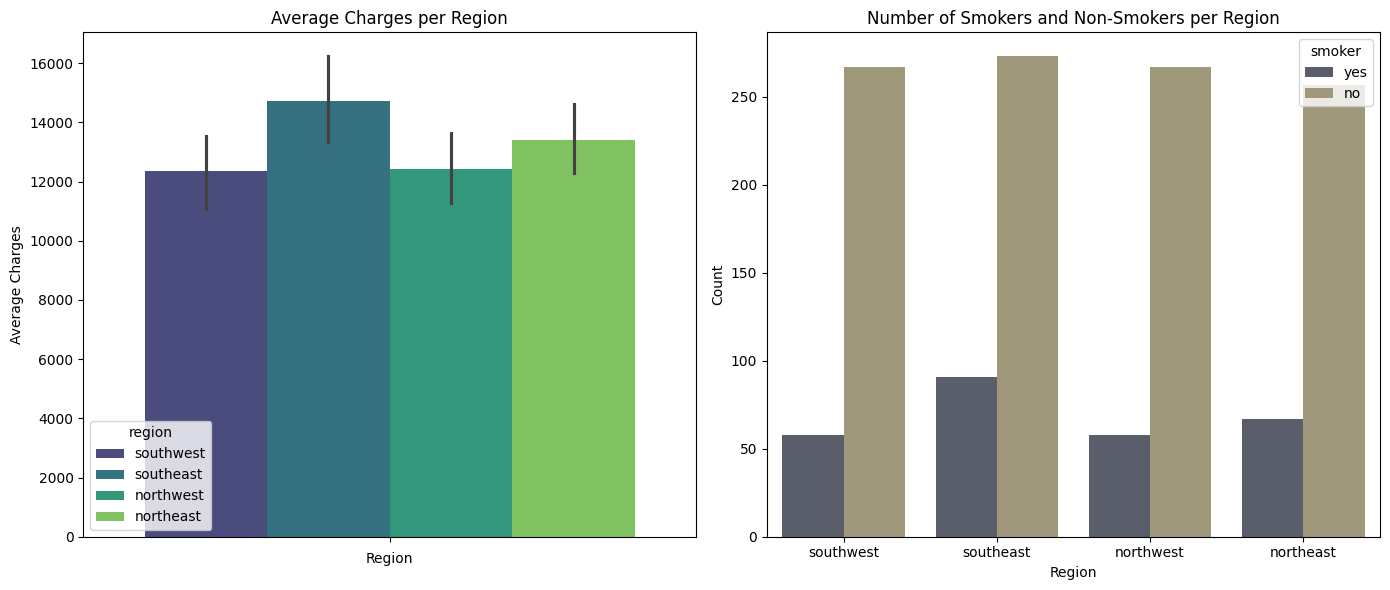

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # 1 rows, 2 columns of subplots

sns.barplot(hue='region', y='charges', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Average Charges per Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Average Charges')

sns.countplot(x='region', hue='smoker', data=df, ax=axes[1], palette='cividis')
axes[1].set_title('Number of Smokers and Non-Smokers per Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Count')

plt.tight_layout()

plt.show()

Above we see that the average charges are highest in SouthEast region and the number of smokers are also highest there. Perhaps there is a relation between smoker status and charges.

Let us now explore whether there is any relation between how old a person is and whether they are a smoker on how much they are charged.

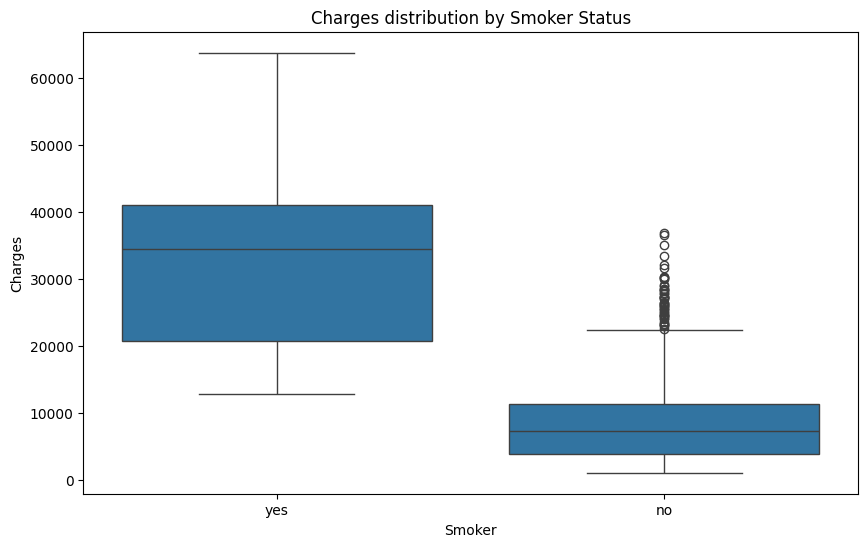

In [ ]:
#Distribution of Charges by Smoker Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges distribution by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

The boxplot shows that there aren't many outliers(anything above the top line called as upper whisker, and below the bottom line called the Lower Whisker) in smokers but quite a few in the non-smoker category.

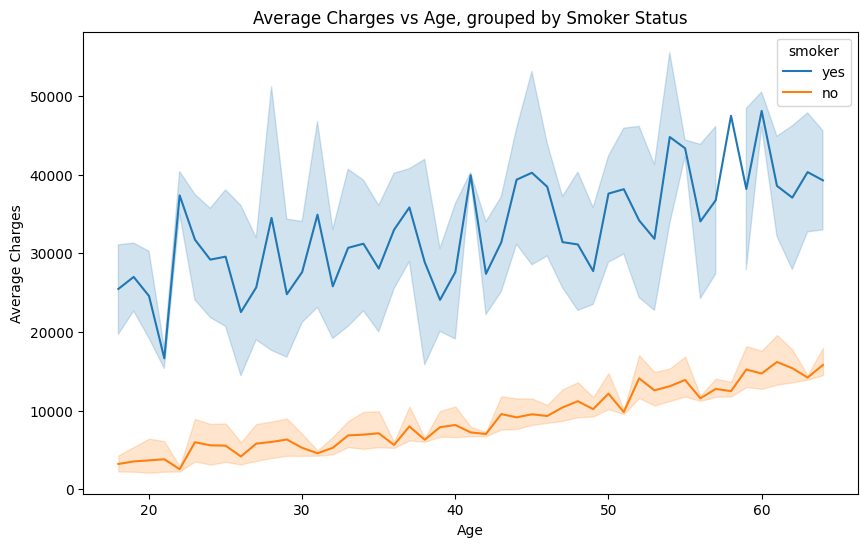

In [ ]:
# Average Charges vs Age, grouped by Smoker Status
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='charges', hue='smoker', data=df, errorbar='ci')
plt.title('Average Charges vs Age, grouped by Smoker Status')
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.show()

#This clearly shows that smokers are charged much more on average across all ages as compared to non smokers. The ci refers to confidence interval of 95%.

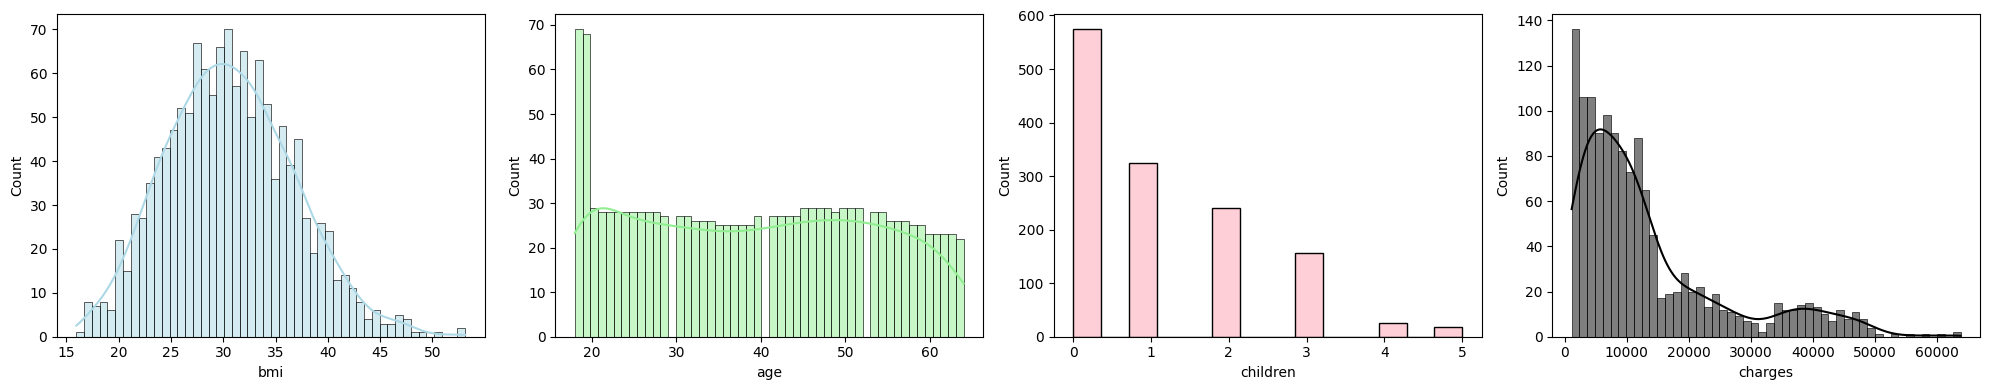

In [ ]:
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.histplot(df['bmi'], kde=True, color='lightblue', bins=50)
#Kernel Density Estimate (KDE) is a method used to estimate the probability density function of a continuous variable.
#Unlike histograms, KDEs provide a smooth curve representing the data distribution, as presented below.
#This can offer a clearer picture of the data.
plt.xlabel('bmi')

plt.subplot(4,4,2)
sns.histplot(df['age'], kde=True, color='lightgreen', bins=50)
plt.xlabel('age')

plt.subplot(4,4,3)
sns.histplot(df['children'], kde=False, color='pink')
plt.xlabel('children')

plt.subplot(4,4,4)
sns.histplot(df['charges'], kde=True, color='black', bins=50)
plt.xlabel('charges')

plt.tight_layout()

plt.show()

The bmi data is in normal distribution.

Age data is pretty much flat after the high peaks in below 20.

Number of children shows a steady decline with increase in the number of children.

The charges are mostly around 10K and then it tapers off as we go to bigger sums.

Next step would ideally be to delete outliers but here we might not want to do so because there might be actual reasons why charges were higher for particular people.

# 2. Data Correlation

## Encoding & Feature Scaling
Let us encode the categorical data into numbers so that it is easy to deal with them.

Feature scaling to bring features on a similar scale. This ensures that all features contribute equally to the model, preventing those with larger ranges from dominating. For e.g. the range of age and # of children is different and we wouldn't want that range of values to skew our analysis.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [ ]:
#Note: this is done only for categorical features and not numerical ones

le = LabelEncoder()

binary_features = ['sex', 'smoker']
for feature in binary_features:
    df[feature] = le.fit_transform(df[feature])
    #It will make the values in sex column (female, male) as 0 and 1; also in the smoker column (yes, no) as 0 and 1. The .inverse_transform() can be used later to get the actual values back.

multiclass_feature = 'region'
df = pd.get_dummies(df, columns=[multiclass_feature])
#As region holds more than 2 values so we can't do 0 and 1. So here we create new columns for each of the region and then fill in True or False based on the actual value.

In [ ]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


Now that we are done with encoding, let us get on to Feature Scaling so that all the values of all features are between specific ranges.

*Min Max Scaler* - All values are between 0 and 1

*Standard Scaler* - All values have mean of 0 and std. deviation of 1

Note: these are done only for numerical features and not categorical ones

In [ ]:
numerical_features = ['age', 'bmi', 'children', 'charges']

df_standard_scaled = df.copy()
df_standard_scaled[numerical_features] = StandardScaler().fit_transform(df_standard_scaled[numerical_features])
df_standard_scaled.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,0.298584,False,False,False,True
1,-1.509965,1,0.509621,-0.078767,0,-0.953689,False,False,True,False
2,-0.797954,1,0.383307,1.580926,0,-0.728675,False,False,True,False
3,-0.441948,1,-1.305531,-0.908614,0,0.719843,False,True,False,False
4,-0.513149,1,-0.292556,-0.908614,0,-0.776802,False,True,False,False


In [ ]:
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_features] = MinMaxScaler().fit_transform(df_minmax_scaled[numerical_features])
df_minmax_scaled.head()
# We will use this one...

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.321227,0.0,1,0.251611,False,False,False,True
1,0.000000,1,0.479150,0.2,0,0.009636,False,False,True,False
2,0.217391,1,0.458434,0.6,0,0.053115,False,False,True,False
3,0.326087,1,0.181464,0.0,0,0.333010,False,True,False,False
4,0.304348,1,0.347592,0.0,0,0.043816,False,True,False,False


Now let us create a correlation matrix and plot it on a heatmap. The higher values indicate higher correlation between different features.

In [ ]:
correlation_matrix = df_minmax_scaled.corr()

<Axes: >

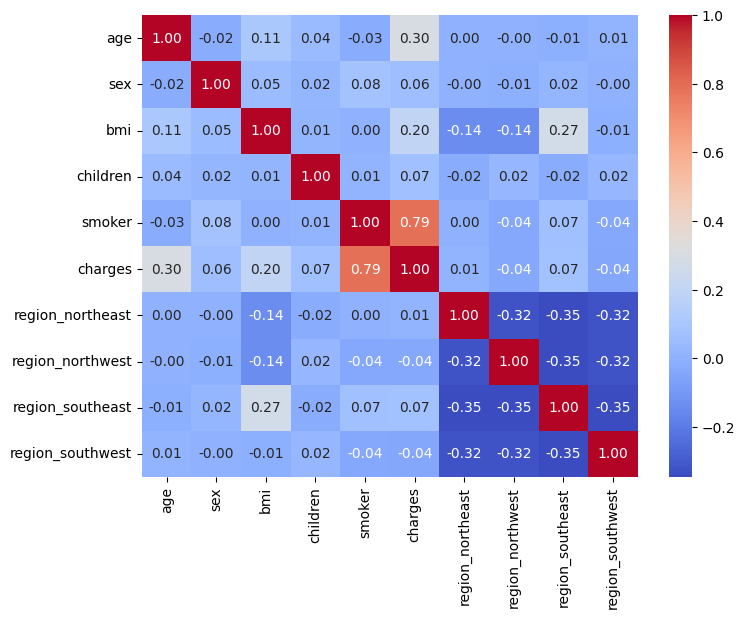

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt = ".2f", cmap="coolwarm")

Here, we can see that smoker status has highest correlation (0.79) with charges. That we saw in our charts also above. Only other feature which has a some correlation with charges are age(0.30) and bmi (0.20)

## Feature Selection
Now let us find out which 5 features would most influence the charges...

### Defining X (independent features) and y(dependent feature)

In [ ]:
X = df_minmax_scaled.drop(columns = ['charges'])
y = df_minmax_scaled['charges']

print("The shape of X is: ", X.shape)
print("The shape of y is: ", y.shape)

The shape of X is:  (1338, 9)
The shape of y is:  (1338,)


In [ ]:
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.321227,0.0,1,False,False,False,True
1,0.000000,1,0.479150,0.2,0,False,False,True,False
2,0.217391,1,0.458434,0.6,0,False,False,True,False
3,0.326087,1,0.181464,0.0,0,False,True,False,False
4,0.304348,1,0.347592,0.0,0,False,True,False,False


In [ ]:
y.head()

,charges
0,0.251611
1,0.009636
2,0.053115
3,0.333010
4,0.043816


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#Recursive Feature Elimination (RFE) is a feature selection algorithm.
#It works by iteratively removing features and building a model with the remaining ones, evaluating performance at each step to identify the most important features.

model = LinearRegression()

k = 5 # Number of features
rfe = RFE(estimator=model, n_features_to_select = k)
rfe.fit(X,y)

X.columns[rfe.support_] #Gives the top k (5) features from X - not in order

Index(['age', 'bmi', 'children', 'smoker', 'region_southeast'], dtype='object')

## Modeling

Now let us build a model...

Which Algorithms to use?


It depends on what type of problem it is.

Since all the data is labeled; it's a supervised learning problem, with the objective of predicting charges (a numerical value) based on the input variables. That means it is a regression problem and not a classification one.

So we could choose from Linear Regression, Decision Trees, Random Forest, Gradient Boosting (GradientBoostingRegressor, XGBoost, LGBMRegressor)

###Test Train Split
Regardless of the model, let us first split the dataset into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80% training and 20% test data

print("The shape of each data segment:")
print(" X_train :", X_train.shape)
print(" y_train :", y_train.shape)

print("\n X_test  :", X_test.shape)
print(" y_test :", y_test.shape)

The shape of each data segment:
 X_train : (1070, 9)
 y_train : (1070,)

 X_test  : (268, 9)
 y_test : (268,)


Now let us run all the models and see which gives us best accuracty when run on the test data.

In [ ]:
#from sklearn.linear_model import LinearRegression --- we had already imported this earlier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

Let us define a function that will help us run any model and return the related metrics.

In [ ]:
def evaluate_model(model_name, X_train, y_train, X_test, y_test):

    if model_name == 'linear_regression':
        model = LinearRegression()
    elif model_name == 'decision_tree':
        model = DecisionTreeRegressor()
    elif model_name == 'random_forest':
        model = RandomForestRegressor()
    elif model_name == 'xgb_regressor':
        model = XGBRegressor()
    elif model_name == 'gradient_regressor':
        model = GradientBoostingRegressor()
    elif model_name == 'adaboost_regressor':
        model = AdaBoostRegressor()
    elif model_name == 'lgbm_regressor':
        model = LGBMRegressor(verbosity=-1) #verbosity = -1 to avoid unnecessary print
    else:
        raise ValueError('Invalid Model Type')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    test_accuracy = r2_score(y_test, y_pred)
    train_accuracy = model.score (X_train, y_train)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    return model_name, test_accuracy, train_accuracy, mae, rmse, mse, mape

In [ ]:
model_names = ['linear_regression', 'decision_tree', 'random_forest', 'lgbm_regressor',
               'xgb_regressor', 'gradient_regressor', 'adaboost_regressor']

results = {'Model Name': [],
           'Test (R2) Score': [],
           'Train Accuracy': [],
           'Mean Absolute Error': [],
           'Root Mean Squared Error': [],
           'Mean Squared Error': [],
           'Mean Absolute Percentage Error': []}

for model_name in model_names:
    model, test_accuracy, train_accuracy, mae, rmse, mse, mape = evaluate_model(model_name, X_train, y_train, X_test, y_test)
    results['Model Name'].append(model_name)
    results['Test (R2) Score'].append(test_accuracy)
    results['Train Accuracy'].append(train_accuracy)
    results['Mean Absolute Error'].append(mae)
    results['Root Mean Squared Error'].append(rmse)
    results['Mean Squared Error'].append(mse)
    results["Mean Absolute Percentage Error"].append(mape)

results_df = pd.DataFrame(results).sort_values(by='Test (R2) Score', ascending=False) #Store in descending order of test accuracy

In [ ]:
results_df

,Model Name,Test (R2) Score,Train Accuracy,Mean Absolute Error,Root Mean Squared Error,Mean Squared Error,Mean Absolute Percentage Error
5,gradient_regressor,0.879404,0.899731,0.038387,0.069067,0.004770,2.017077
3,lgbm_regressor,0.865381,0.940616,0.041595,0.072972,0.005325,1.437726
2,random_forest,0.860713,0.975551,0.041017,0.074226,0.005510,2.171283
4,xgb_regressor,0.854591,0.994835,0.041495,0.075840,0.005752,2.712725
6,adaboost_regressor,0.826998,0.839668,0.064088,0.082723,0.006843,3.459245
0,linear_regression,0.783593,0.741726,0.066740,0.092521,0.008560,1.880816
1,decision_tree,0.730274,0.998308,0.049305,0.103291,0.010669,6.647347


The best model according to Test R2 score is GradientBoostingRegressor with 87.97% accuracy.

Now we could either leave with this model or try to do hyperparameter tuning to see if we can improve the accuracy even further.

## Hyperparameter Tuning

We are choosing Grid Search algorithm. Please note that this takes some time to execute as it runs the model with different parameters and looks for best possible combination for highest test accuracy...

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the model
gbr = GradientBoostingRegressor(random_state=42) # as this was the best model in our previous analysis.
#It is however possible that some other model might get a higher increase in this hyperparameter tuning exercise.

# Define the hyperparameters and their possible values to search over
# These are just example ranges; you might need to adjust them based on your data and initial results
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Contribution of each tree to the final prediction
    'max_depth': [3, 4, 5], # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
# estimator: the model to tune
# param_grid: the dictionary of hyperparameters and their values
# cv: number of cross-validation folds
# scoring: the metric to optimize (use negative MAE or RMSE for error minimization)
# n_jobs: number of CPU cores to use (-1 uses all available)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the GridSearchCV object to your training data
# This will perform the grid search and cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model with the optimal hyperparameters
best_gbr_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_tuned = best_gbr_model.predict(X_test)

tuned_test_r2 = r2_score(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_rmse = root_mean_squared_error(y_test, y_pred_tuned)
tuned_mse = mean_squared_error(y_test, y_pred_tuned)
tuned_mape = mean_absolute_percentage_error(y_test, y_pred_tuned)


print("\nMetrics for Tuned Gradient Boosting Regressor:")
print(f"Test (R2) Score: {tuned_test_r2:.3f}")
print(f"Mean Absolute Error: {tuned_mae:.3f}")
print(f"Root Mean Squared Error: {tuned_rmse:.3f}")
print(f"Mean Squared Error: {tuned_mse:.3f}")
print(f"Mean Absolute Percentage Error: {tuned_mape:.3f}")

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Metrics for Tuned Gradient Boosting Regressor:
Test (R2) Score: 0.880
Mean Absolute Error: 0.039
Root Mean Squared Error: 0.069
Mean Squared Error: 0.005
Mean Absolute Percentage Error: 1.597


Test (R2) Score	0.879404 0.880
Train Accuracy	0.899731
Mean Absolute Error	Root 0.038387 0.039
Mean Squared Error	0.069067 0.069
Mean Squared Error	0.004770 0.005
Mean Absolute Percentage Error 2.017077 1.597


